# Most Commonly Used sklearn Components in Open Source Repos

### Load and Transform Data

In [16]:
import pickle
import pandas as pd
from collections import Counter

from analysis_utils import extract_repo_info, count_component_occurrences, plot_component_popularity, analyze_components_correlation, identify_elbow_components, plot_lorenz_curve, create_styled_table

In [17]:
py_df = pd.read_parquet('./sklearn_components_counts_py.parquet')
py_df = extract_repo_info(py_df)

ipynb_df = pd.read_parquet('./sklearn_components_counts.parquet')
ipynb_df.rename(columns={'module': 'library'}, inplace=True)
ipynb_df = extract_repo_info(ipynb_df)

py_ipynb_df = pd.concat([py_df, ipynb_df])
py_ipynb_df

,repo,filename,library,component_type,component_name,count
0,0hq/tinyvector,tinyvector/database.py,sklearn,class,PCA,1
1,0ssamaak0/DLTA-AI,DLTA_AI_app/mmdetection/mmdet/models/dense_hea...,sklearn,class,GaussianMixture,1
2,0ssamaak0/DLTA-AI,DLTA_AI_app/mmdetection/mmdet/models/dense_hea...,sklearn,method,fit,1
3,0ssamaak0/DLTA-AI,DLTA_AI_app/mmdetection/mmdet/models/dense_hea...,sklearn,method,predict,1
4,0ssamaak0/DLTA-AI,DLTA_AI_app/mmdetection/mmdet/models/dense_hea...,sklearn,method,score_samples,1
...,...,...,...,...,...,...
42254,zjost/blog_code,tab2graph_fraud/xente_tabular_to_graph.ipynb,sklearn,function,roc_curve,1
42255,zjost/blog_code,tab2graph_fraud/xente_tabular_to_graph.ipynb,sklearn,method,fit,4
42256,zjost/blog_code,tab2graph_fraud/xente_tabular_to_graph.ipynb,sklearn,method,predict,6
42257,zjost/blog_code,tab2graph_fraud/xente_tabular_to_graph.ipynb,sklearn,method,predict_proba,6


In [18]:
with open('/home/tobiasz/Repos/python-libraries-stats/jupyter-notebook-repos.pickle', 'rb') as f:
    sklearn_repos = pickle.load(f)
    del sklearn_repos['saved_dates']
sklearn_repos

{'LibraryOfCongress/newspaper-navigator': {'id': 231426741,
  'name': 'newspaper-navigator',
  'full_name': 'LibraryOfCongress/newspaper-navigator',
  'html_url': 'https://github.com/LibraryOfCongress/newspaper-navigator',
  'created_at': '2020-01-02T17:16:06Z',
  'updated_at': '2024-04-23T03:22:29Z',
  'size': 1604160,
  'stargazers_count': 224,
  'topics': [],
  'watchers': 224,
  'license': {'key': 'unlicense',
   'name': 'The Unlicense',
   'spdx_id': 'Unlicense',
   'url': 'https://api.github.com/licenses/unlicense',
   'node_id': 'MDc6TGljZW5zZTE1'}},
 'raveendarv/AppliedAiCourse-AssignmentAndNotes': {'id': 231320844,
  'name': 'AppliedAiCourse-AssignmentAndNotes',
  'full_name': 'raveendarv/AppliedAiCourse-AssignmentAndNotes',
  'html_url': 'https://github.com/raveendarv/AppliedAiCourse-AssignmentAndNotes',
  'created_at': '2020-01-02T06:25:28Z',
  'updated_at': '2024-04-27T11:24:21Z',
  'size': 341645,
  'stargazers_count': 169,
  'topics': [],
  'watchers': 169,
  'license': {

In [19]:
records = []
for repo, details in sklearn_repos.items():
    record = {
        # 'repo': repo,
        # 'id': details['id'],
        'name': details['name'],
        'full_name': details['full_name'],
        # 'html_url': details['html_url'],
        # 'created_at': details['created_at'],
        # 'updated_at': details['updated_at'],
        'size': details['size'],
        'stargazers_count': details['stargazers_count'],
        # 'watchers': details['watchers'],
        # 'license_key': details['license']['key'] if details['license'] else None,
        # 'license_name': details['license']['name'] if details['license'] else None,
        # 'license_spdx_id': details['license']['spdx_id'] if details['license'] else None,
        # 'license_url': details['license']['url'] if details['license'] else None,
        'topics': details['topics'] if 'topics' in details else []
    }
    records.append(record)

all_sklearn_repos_df = pd.DataFrame(records)
sklearn_repos_df = all_sklearn_repos_df[all_sklearn_repos_df['full_name'].isin(py_ipynb_df['repo'])]
sklearn_repos_df

,name,full_name,size,stargazers_count,topics
0,newspaper-navigator,LibraryOfCongress/newspaper-navigator,1604160,224,[]
1,AppliedAiCourse-AssignmentAndNotes,raveendarv/AppliedAiCourse-AssignmentAndNotes,341645,169,[]
14,mslearn-aml-labs,MicrosoftDocs/mslearn-aml-labs,524,200,[]
15,Trajectron-plus-plus,StanfordASL/Trajectron-plus-plus,143468,618,"[autonomous-vehicles, deep-learning, human-rob..."
17,pulearn,pulearn/pulearn,1406,200,[]
...,...,...,...,...,...
3555,FeatUp,mhamilton723/FeatUp,39976,1042,[]
3556,youtube-rag,svpino/youtube-rag,1585,125,[]
3558,Machine_Learning_Sklearn_Examples,solidglue/Machine_Learning_Sklearn_Examples,3568,103,"[machine-learning, sklearn]"
3576,cookbook,google-gemini/cookbook,8117,2268,"[gemini, gemini-api]"


In [20]:
top_100_repos_names = sklearn_repos_df.sort_values(ascending=False, by='stargazers_count').head(100)['full_name']
top_100_repos = py_ipynb_df[py_ipynb_df['repo'].isin(top_100_repos_names)]

In [21]:
merged_df = pd.merge(py_ipynb_df, sklearn_repos_df, left_on='repo', right_on='full_name')

### By Number of Repos they Appear in

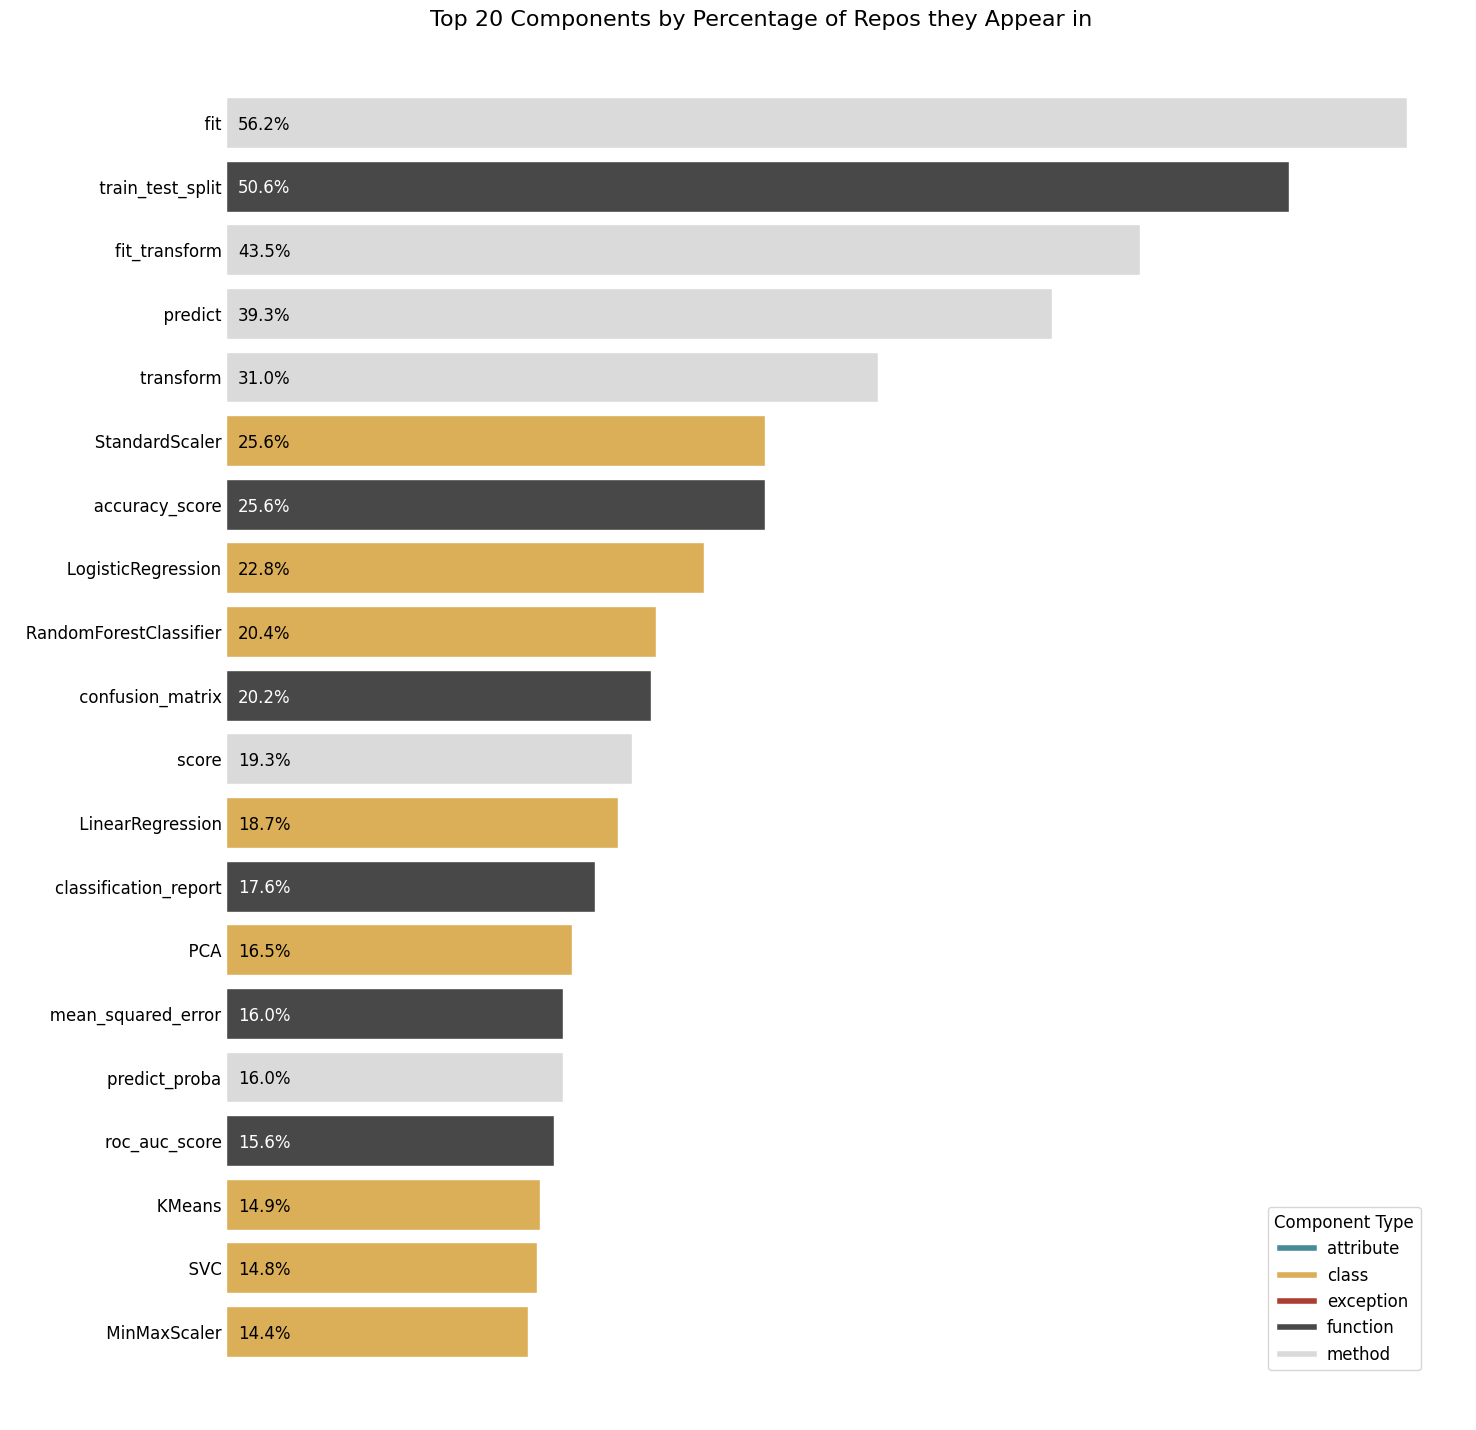

In [22]:
repo_count = ipynb_df['repo'].nunique()
component_counts = count_component_occurrences(ipynb_df, within_column='repo')
plot_component_popularity(component_counts, 'Top 20 Components by Percentage of Repos they Appear in', divide_by_to_show_prc=repo_count, top_n=20)

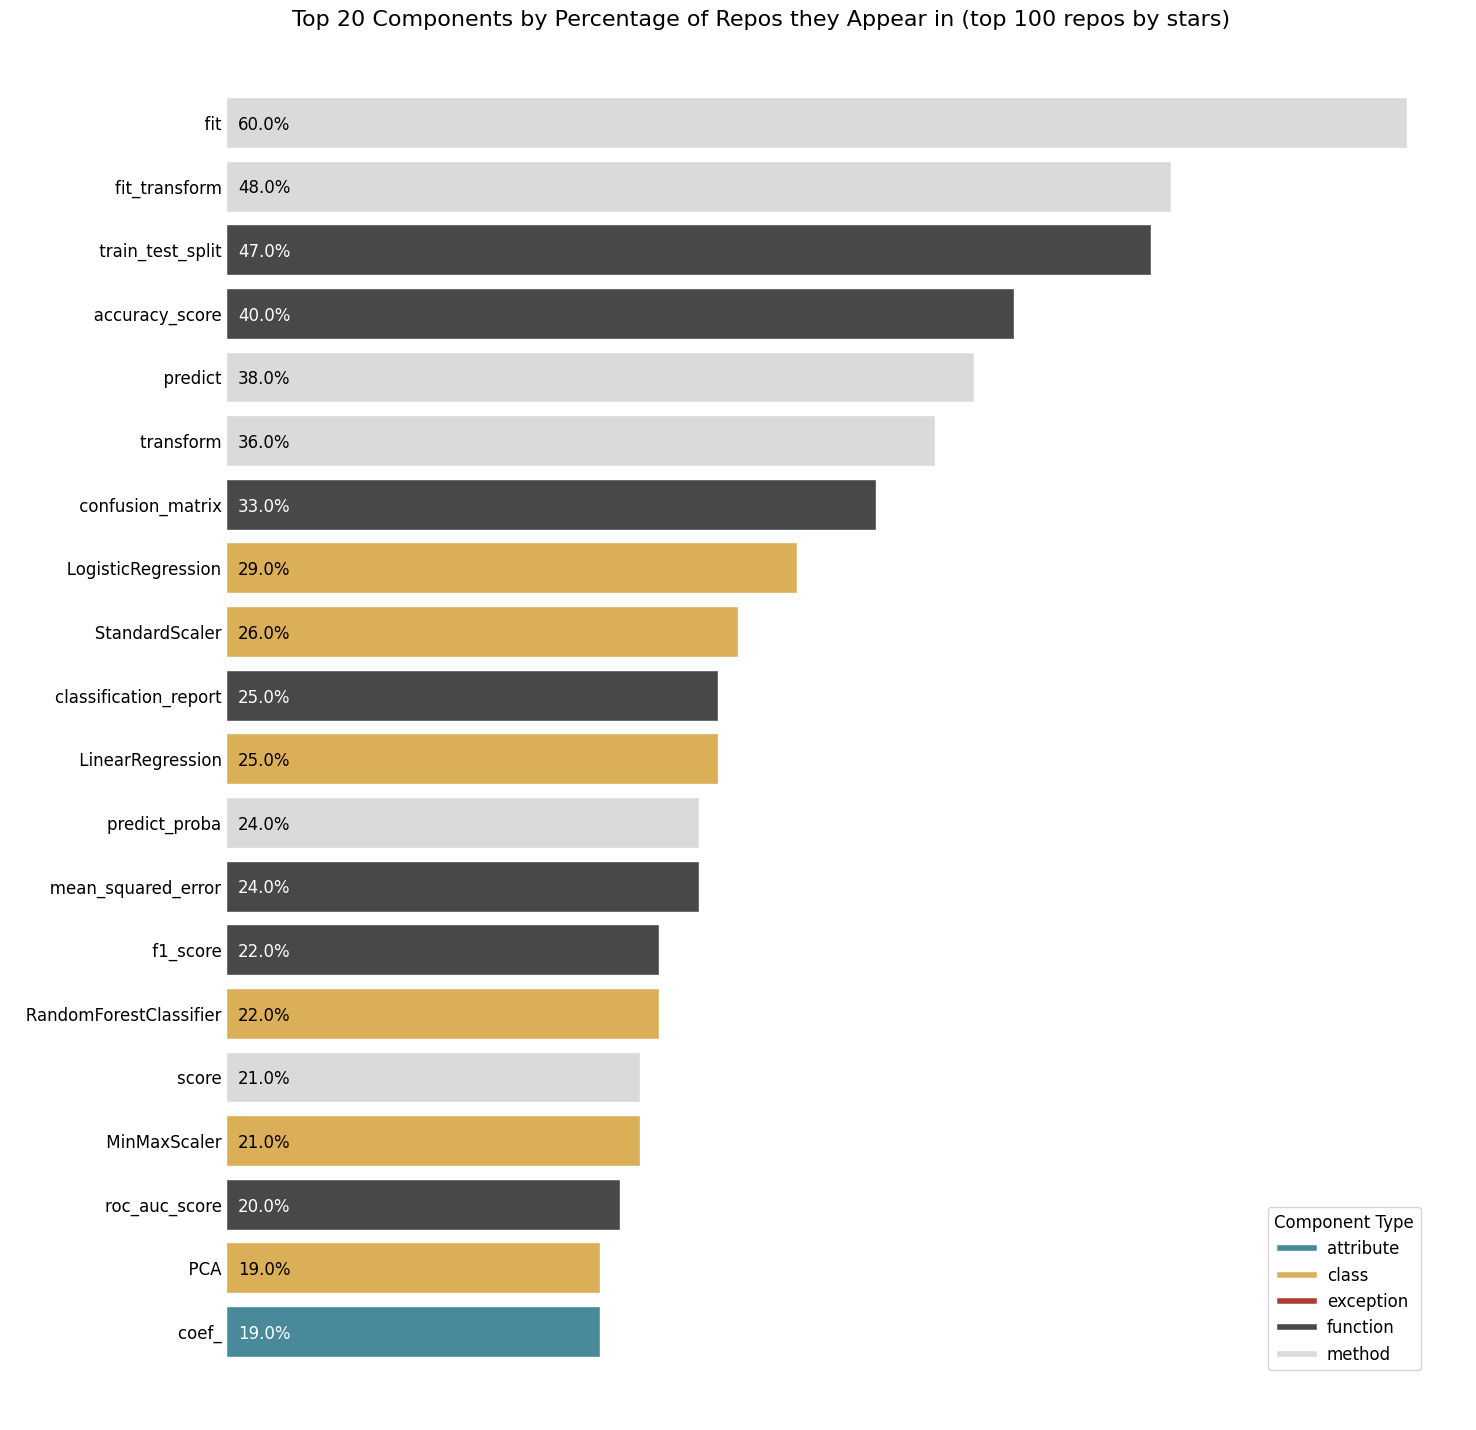

In [23]:
repo_count = top_100_repos['repo'].nunique()
component_counts = count_component_occurrences(top_100_repos, within_column='repo')
plot_component_popularity(component_counts, 'Top 20 Components by Percentage of Repos they Appear in (top 100 repos by stars)', divide_by_to_show_prc=repo_count, top_n=20)

### By number of Files they Appear in

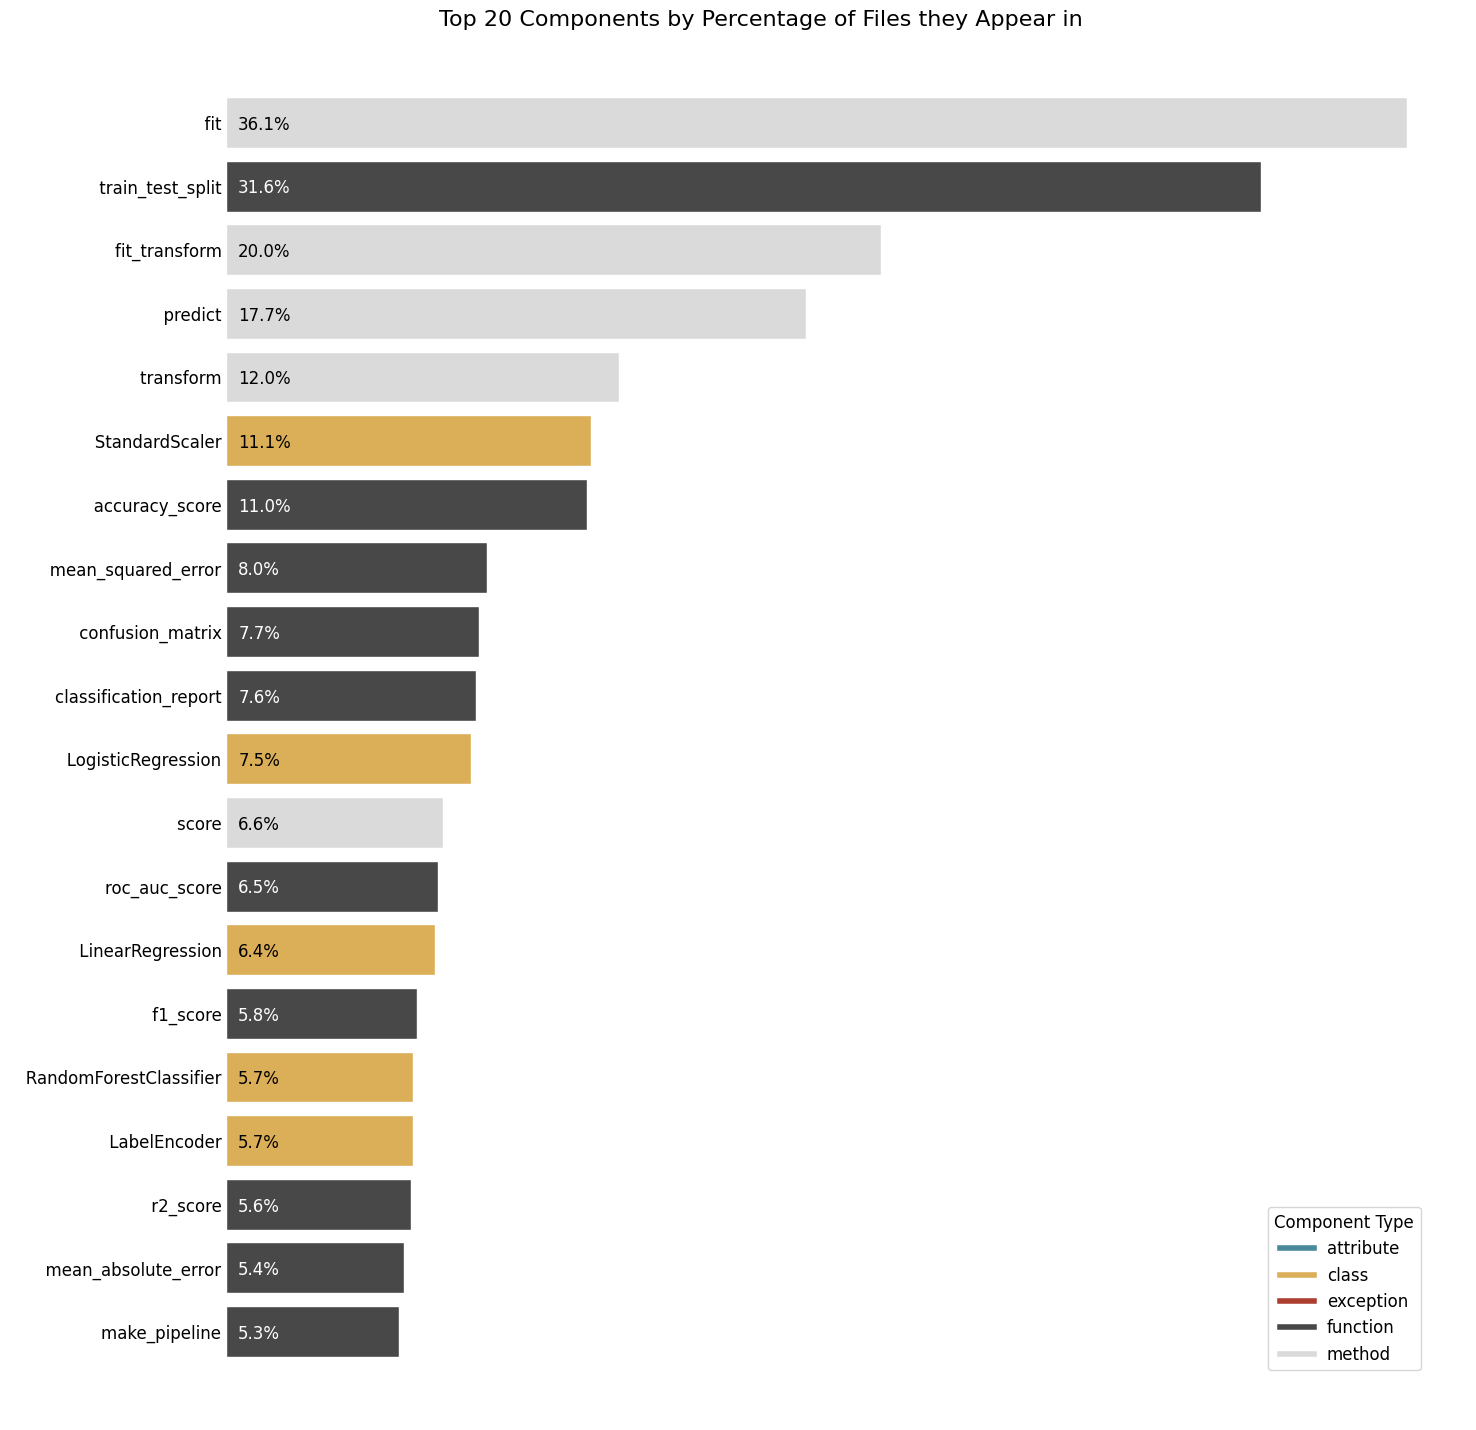

In [24]:
file_count = py_ipynb_df['filename'].nunique()
component_counts = count_component_occurrences(py_ipynb_df, within_column='filename')
plot_component_popularity(component_counts, 'Top 20 Components by Percentage of Files they Appear in', divide_by_to_show_prc=file_count, top_n=20)

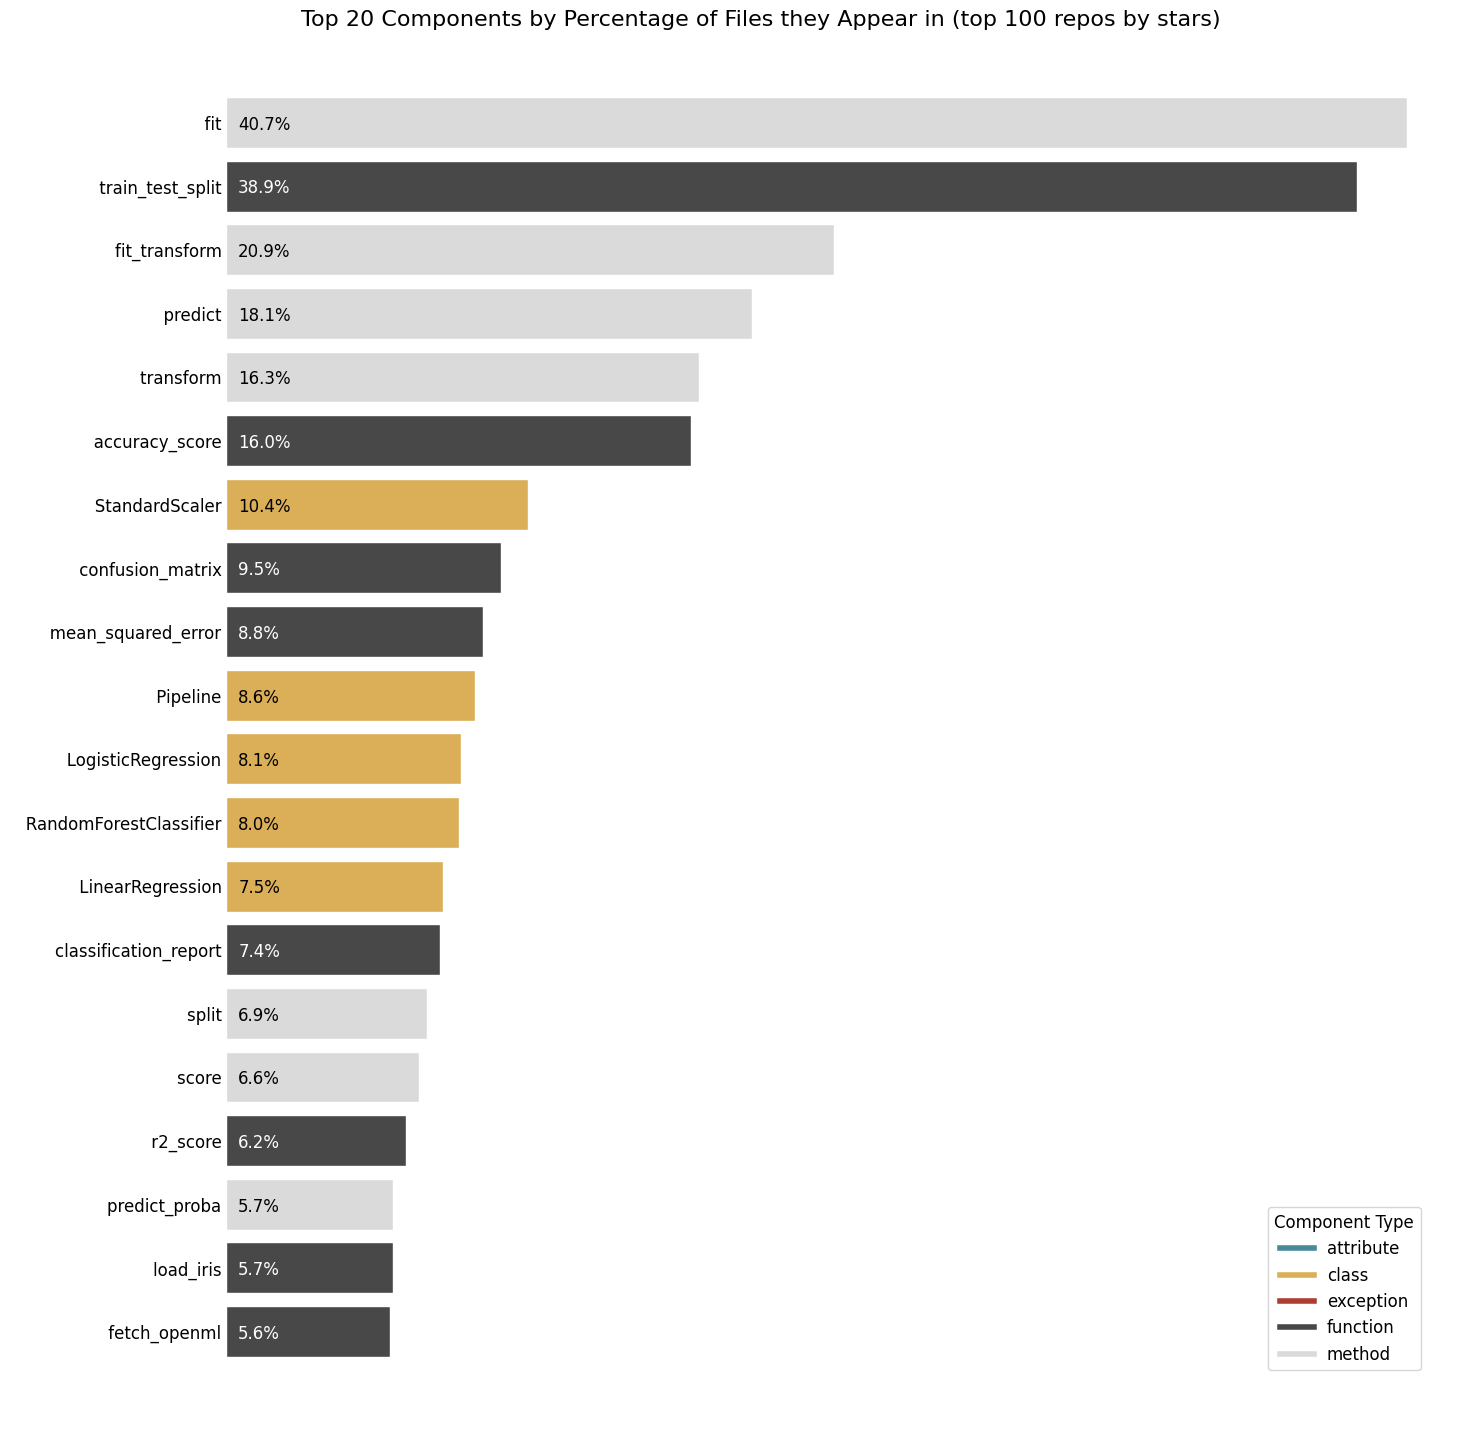

In [25]:
file_count = top_100_repos['filename'].nunique()
component_counts = count_component_occurrences(top_100_repos, within_column='filename')
plot_component_popularity(component_counts, 'Top 20 Components by Percentage of Files they Appear in (top 100 repos by stars)', divide_by_to_show_prc=file_count, top_n=20)

### Raw Numbers

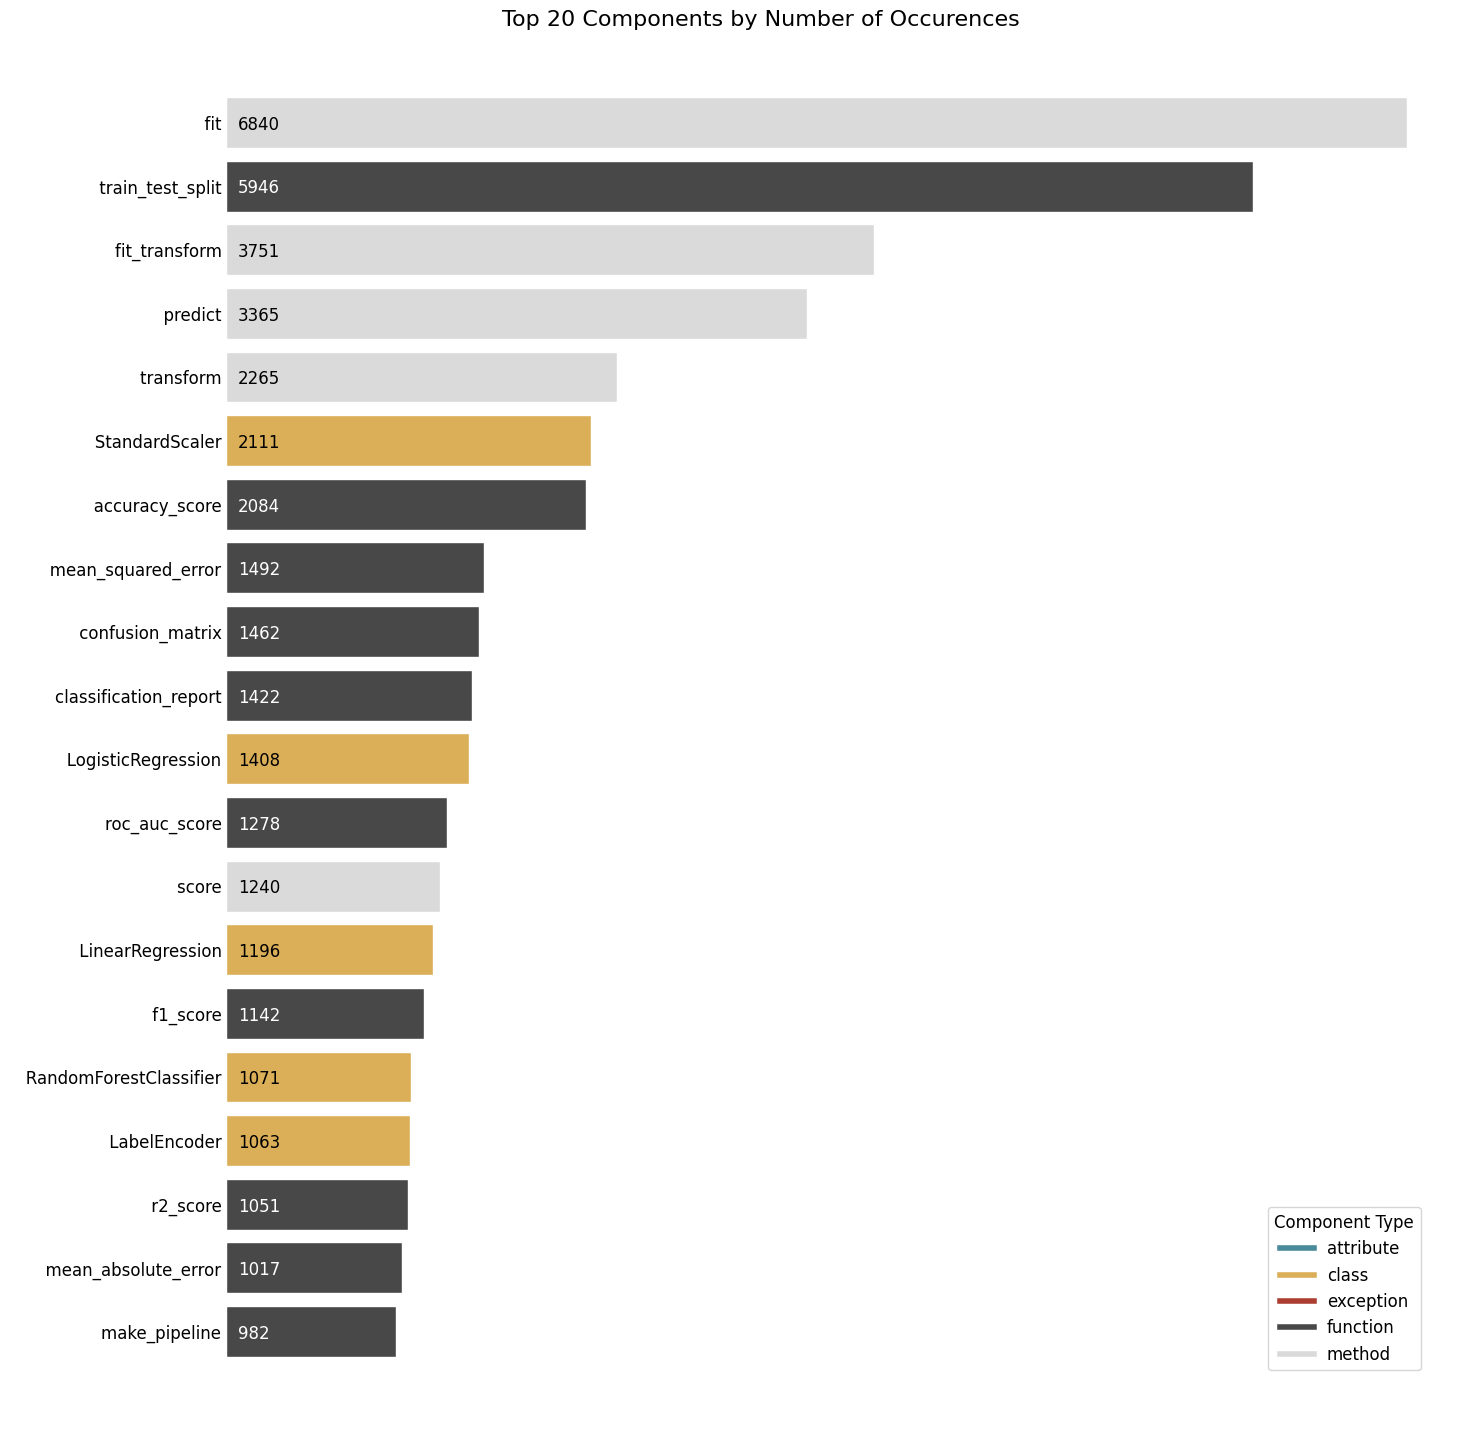

In [26]:
component_counts = count_component_occurrences(py_ipynb_df)
plot_component_popularity(component_counts, 'Top 20 Components by Number of Occurences', top_n=20)

### Size of Repository or Stargazers Count vs Usage of Components

In [27]:
sorted_correlations = analyze_components_correlation(merged_df)
sorted_correlations.head(20)

,component_type,component_name,correlation,p_value,original_num_repos,num_usages
14,class,GradientBoostingClassifier,0.465217,2.393480e-47,50,262
11,class,ExtraTreesClassifier,0.395594,1.458905e-33,25,85
27,class,MLPClassifier,0.305252,5.544899e-20,41,155
25,class,LinearSVC,0.280823,4.947439e-17,48,169
36,class,RandomForestClassifier,0.265582,2.470865e-15,182,1198
113,function,train_test_split,0.264283,3.408621e-15,405,5524
101,method,predict,0.257895,1.618365e-14,350,6875
52,function,accuracy_score,0.245574,2.898487e-13,251,2718
13,class,GaussianNB,0.233416,4.297081e-12,62,257
61,function,confusion_matrix,0.225744,2.183189e-11,203,1634


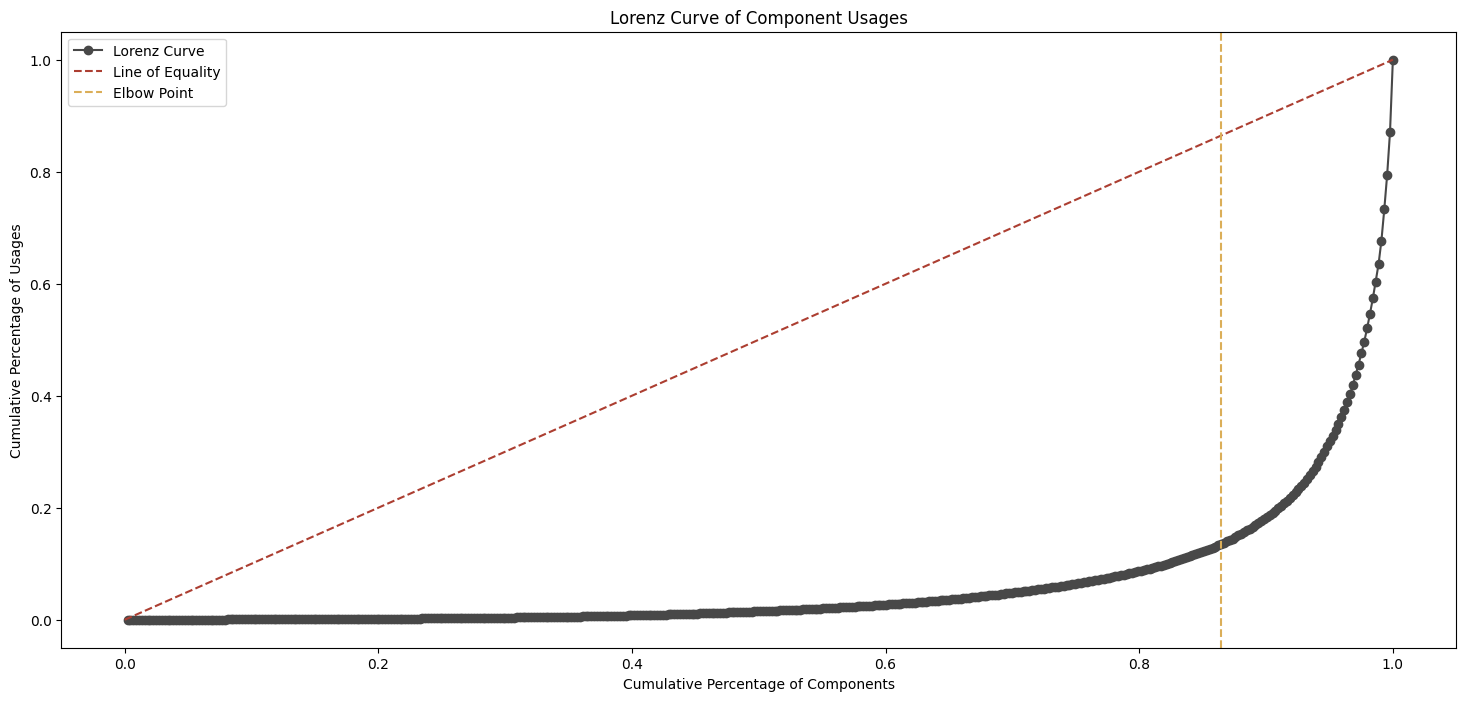

In [28]:
elbow_components, elbow_index, component_usage = identify_elbow_components(merged_df)
plot_lorenz_curve(component_usage, elbow_index)

In [29]:
create_styled_table(elbow_components)

### Most Popular Topics

In [30]:
all_topics = [topic for sublist in all_sklearn_repos_df['topics'] for topic in sublist]
Counter(all_topics)

Counter({'machine-learning': 420,
         'deep-learning': 417,
         'python': 381,
         'pytorch': 283,
         'data-science': 154,
         'computer-vision': 132,
         'nlp': 102,
         'tensorflow': 85,
         'ai': 75,
         'jupyter-notebook': 70,
         'transformers': 65,
         'natural-language-processing': 65,
         'llm': 65,
         'hacktoberfest': 60,
         'artificial-intelligence': 51,
         'pandas': 51,
         'transformer': 51,
         'chatgpt': 50,
         'python3': 49,
         'stable-diffusion': 48,
         'dataset': 46,
         'openai': 46,
         'large-language-models': 45,
         'data-analysis': 43,
         'jupyter': 40,
         'neural-networks': 40,
         'object-detection': 40,
         'reinforcement-learning': 39,
         'neural-network': 38,
         'diffusion-models': 38,
         'gan': 36,
         'mlops': 35,
         'numpy': 34,
         'time-series': 33,
         'gpt': 33,
         